# Generating periodic superpositions of functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deft

def plot_side_by_side(plots):
    plt.rc('font', size=14)
    fig, ax = plt.subplots(1,2,sharey=True,figsize=[10,3.5])
    legend_l = []; legend_r = []
    for p in plots:
        if p[3] == 'left':
            ax[0].plot(p[0], p[1])
            legend_l.append(p[2])
        elif p[3] == 'right':
            ax[1].plot(p[0], p[1])
            legend_r.append(p[2])
    ax[0].legend(legend_l); ax[1].legend(legend_r)
    plt.tight_layout()
    plt.show()

### Two radially-symmetric functions

Consider the following radially-symmetric functions

$$
f(\mathbf{r}) = \frac{1}{\pi} e^{-2r}
\qquad \text{and} \qquad
g(\mathbf{r}) = \frac{1}{\pi^{3/2}} e^{-r^2},
$$

both of which are normalized to yield one when integrated over all space.

(In fact, $f(\mathbf{r})$ is the electron density for a hydrogen atom and $g(\mathbf{r})$ is the probability density for the lowest energy state of an isotropic harmonic oscillator in three dimensions.)

The following code block defines and plots these functions.

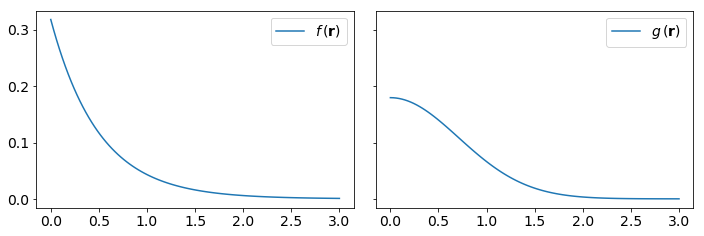

In [2]:
def f(r):
    return 1.0/np.pi * np.exp(-2.0*r)
def g(r):
    return 1.0/np.pi**1.5 * np.exp(-r*r)

r = np.linspace(0,3,100)
plot_side_by_side([ [r, f(r), '$f\,(\mathbf{r})$', 'left'],
                    [r, g(r), '$g\,(\mathbf{r})$',   'right'] ])

### Fourier transforms of the two radially-symmetric functions

The three-dimensional Fourier transforms of the two functions are

$$
\tilde{f}(\mathbf{k}) = \frac{16}{(k^2+4)^2}
\qquad \text{and} \qquad
\tilde{g}(\mathbf{k}) = e^{-k^2/4},
$$

which are defined next.

In [3]:
def f_tilde(k):
    return 16.0/(k*k+4.0)**2
def g_tilde(k):
    return np.exp(-k*k/4.0)

### Use *deft* to construct the periodic superpositions

In [4]:
# create the lattice vectors
lat_len = 10.0
v_x = [lat_len, 0.0, 0.0];  v_y = [0.0, lat_len, 0.0];  v_z = [0.0, 0.0, lat_len]

# set atom locations
loc = np.zeros([2,3])
loc[1,:] = [3.0, 0.0, 0.0]

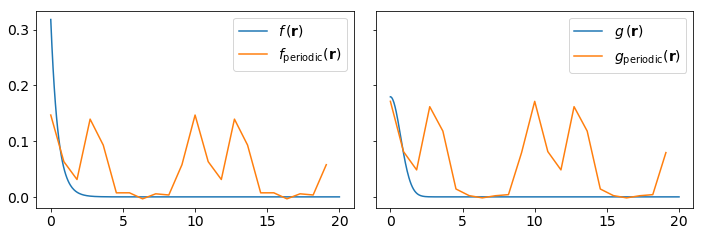

In [5]:
# choose the number of grid points along each direction
gpts = 11

# use deft to compute the periodic superpositions
f_periodic = deft.compute_periodic_superposition([gpts,gpts,gpts], loc, v_x, v_y, v_z, f_tilde)
g_periodic = deft.compute_periodic_superposition([gpts,gpts,gpts], loc, v_x, v_y, v_z, g_tilde)

# plot along the x-axis over two unit cells
r_2 = np.linspace(0, 2*lat_len, 500)
x_2 = np.linspace(0, 2*lat_len, 2*gpts, endpoint=False)
f_p_2 = np.concatenate((f_periodic[:,0,0], f_periodic[:,0,0]))
g_p_2 = np.concatenate((g_periodic[:,0,0], g_periodic[:,0,0]))
plot_side_by_side([ [r_2, f(r_2), '$f\,(\mathbf{r})$', 'left'],
                    [x_2, f_p_2, '$f_{\mathrm{periodic}}(\mathbf{r})$', 'left'],
                    [r_2, g(r_2), '$g\,(\mathbf{r})$', 'right'],
                    [x_2, g_p_2, '$g_{\mathrm{periodic}}(\mathbf{r})$', 'right'] ])

When the number of grid points is increased, the quality of the plots increases dramatically.

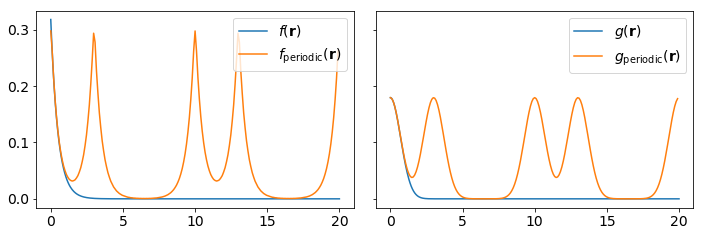

In [6]:
# choose the number of grid points along each direction
gpts = 101

# use deft to compute the periodic superpositions
f_periodic = deft.compute_periodic_superposition([gpts,gpts,gpts], loc, v_x, v_y, v_z, f_tilde)
g_periodic = deft.compute_periodic_superposition([gpts,gpts,gpts], loc, v_x, v_y, v_z, g_tilde)

# plot along the x-axis over two unit cells
r_2 = np.linspace(0, 2*lat_len, 500)
x_2 = np.linspace(0, 2*lat_len, 2*gpts, endpoint=False)
f_p_2 = np.concatenate((f_periodic[:,0,0], f_periodic[:,0,0]))
g_p_2 = np.concatenate((g_periodic[:,0,0], g_periodic[:,0,0]))
plot_side_by_side([ [r_2, f(r_2), '$f(\mathbf{r})$', 'left'],
                    [x_2, f_p_2, '$f_{\mathrm{periodic}}(\mathbf{r})$', 'left'],
                    [r_2, g(r_2), '$g(\mathbf{r})$', 'right'],
                    [x_2, g_p_2, '$g_{\mathrm{periodic}}(\mathbf{r})$', 'right'] ])